# Machine learning

- Le but de ce dossier est de prédire les survivants du titanic.
- Je cré un fichier (submission.csv) pour le soumettre à Kaggle.
- Ce fichier contient 2 colonnes:
- PassengerId qui provient du fichier de test
- Survived contient les prédictions obtenues à partir des données de (test) par le réseau de neurones

Avant de commencer, il est trés important de bien connaitre le contenu du fichier csv
 - Savoir combien il y a de lignes et de colonnes.
 - la présence de données catégorielles ou non
 - identifier la cible ou target ou variable à expliquée.


# Installation des bibliotheques

In [2]:
'''

    importation des bibliotheques

'''
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns 
%matplotlib inline



In [3]:
'''

    charger le dataframe  

'''

train = pd.read_csv('train.csv')




- PassengerId = est l'identifiant unique de la ligne et il n'a aucun effet sur la cible
- Survived    = est la variable cible que nous essayons de prédire (0 ou 1)
- Pclass      = (Classe Passager) est le statut socio-économique du passager et il s'agit d'une caractéristique ordinale catégorielle qui a 3 valeurs uniques (1, 2 ou 3)
- Name
- Sex
- Age
- SibSp       = est le nombre total de frères et sœurs et du conjoint des passagers
- Parch       = est le nombre total de parents et d'enfants des passagers
- Ticket      = est le numéro de billet du passager
- Fare        = est le tarif passager
- Cabin       = est le numéro de cabine du passager
- Embarked    = est le port d'embarquement et c'est une caractéristique catégorielle qui a 3 valeurs uniques 
- C = Cherbourg
- Q = Queenstown
- S = Southampton

# Prétraitement des données

In [4]:
'''
    informations

'''

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Il manque des données dans les colonnes Age et Cabin

# Gestion des valeurs manquantes

In [5]:
'''

    verifier si il y a des données nan 

'''

train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
'''

    remplacer les valeurs manquantes de colonne par la moyenne de la colonne

'''

train= train.fillna(value=train['Age'].mean())
#train = train.fillna(value=train['Fare'].mean())

# Pour vérifier les modifications..............

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.699118,S


In [8]:
'''

    supprimer les colonnes inutiles 

'''

train = train.drop('Name', axis=1)
train = train.drop('Ticket', axis=1)
train = train.drop('Cabin', axis=1)

# ou

#dataset.drop(columns=['colonne1', 'colonne2', 'colonne3'])


In [9]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [10]:
'''

    une methode pour convertir et avoir moins de colonnes

'''

train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
#test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [11]:
'''

    remplacer les variables catégorielles

'''

train['Embarked'] = train['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})
#test['Embarked'] = test['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})


In [12]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1.0
1,2,1,1,1,38.0,1,0,71.2833,2.0
2,3,1,3,1,26.0,0,0,7.9250,1.0
3,4,1,1,1,35.0,1,0,53.1000,1.0
4,5,0,3,0,35.0,0,0,8.0500,1.0


In [13]:

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [14]:
'''

    supprimer des lignes ou colonnes avec des valeurs manquantes NaN 

'''

train = train.dropna()


In [15]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [17]:
'''

        isoler la variable à expliquer des variables explicatives

'''

#X = train.drop("Survived", axis=1)
#y = train["Survived"] # cible

# ou

'''

        sélectionner des colonnes...

'''

X = train[['PassengerId','Pclass', 'Age', 'Fare', 'Sex']]
y = train['Survived']



In [18]:
'''

création ensemble train et test

'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest

In [19]:
'''
    Démarrage de l'algorithme Random Forest

'''

from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8146067415730337

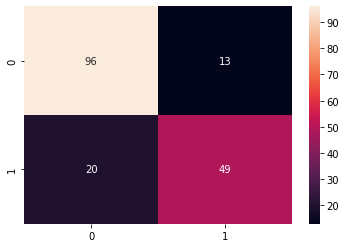

In [21]:
'''

    matrice de confusion

'''

import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()


- 96 + 49 = 145 prédictions exactes
- 20 + 13 = 33 fausses prédictions
- soit:
- 96 morts
- 49 survivants
    

# Logistic Regression

In [22]:
'''

    Démarrage de l'algorithme Logistic Regression

'''

from sklearn.linear_model import LogisticRegression

# Pour Initialiser le model
logistic_regression = LogisticRegression()

logistic_regression =LogisticRegression(max_iter=3000)


# Pour entrainer le model
logistic_regression.fit(X_train, y_train)

# Pour prédire la cible ou target en utilisant les données de test
y_pred = logistic_regression.predict(X_test)


In [23]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.797752808988764

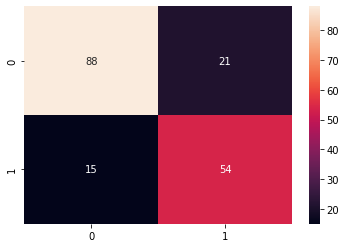

In [24]:
'''

    matrice de confusion

'''

import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()


- 88 + 54 = 142 prédictions exactes
- 15 + 21 = 36 fausses prédictions
- soit:
- 88 morts
- 54 survivants

# Décision Trees ( Arbre de Décision)

In [26]:
'''
Démarrage de l'algorithme Decision Trees (Arbre de decision)

'''

from sklearn import tree


clf = tree.DecisionTreeClassifier()


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)



In [27]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7584269662921348

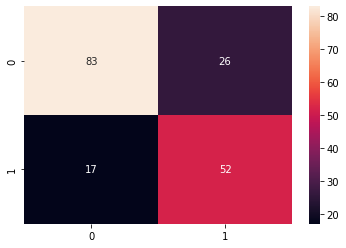

In [29]:
'''

    matrice de confusion

'''

import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()

- 83 + 52 = 135 prédictions exactes
- 17 + 26 = 43 fausses prédictions
- soit:
- 83 morts
- 52 survivants

# Pour créer un fichier csv pour soumettre à kagggle.com

In [30]:
'''
charger le fichier test.csv sans la colonne survived
'''

test = pd.read_csv('test.csv')

In [31]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
test.shape

(418, 11)

In [39]:
'''

    création d'un dataframe pour le fichier .csv

'''

#submit = pd.DataFrame({"PassengerId":test.PassengerId, 'Survived':y_pred})
#submit.to_csv("final_submission.csv",index = False)


"\n\n    création d'un dataframe et fichier .csv\n\n"

# Caisse à Outils

In [24]:
'''

    convertir en float32 toutes les colonnes...........

'''

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [ ]:
'''

    convertir certaines colonnes

'''

# dataset[float64_cols] = dataset[float64_cols].astype('float32')

In [ ]:
'''

    renommer les colonnes 

'''

dataset_rename = dataset.rename(columns={'nom':'nouveau nom', 'nom2':'nouveau nom2'})
dataset_rename

In [ ]:
'''

    supprimer les doublons

'''

dataset_doublons = dataset.drop_duplicates()

In [16]:
'''

    Remplassez les valeurs NA/NaN en utilisant la méthode spécifiée.
    
'''

#train_preprocesed = train.fillna(train.mean())
#train_preprocesed.head()


In [37]:
'''

    supprimer des lignes ou colonnes avec des valeurs manquantes NaN 

'''

X_train = X_train.dropna()


# Traitements des variables catégorielles

In [19]:
'''

    méthode pour le codage catégorielle

'''

#train = pd.get_dummies(train, columns=["Sex", "Embarked"])

#test = pd.get_dummies(test, columns=["Sex","Embarked"])

#train.head(5)

In [ ]:
'''

    Vectorisation des labels ou étiquettes

'''

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [57]:
'''

    visualiser les modification dans les données..............

'''

train.head()


'\n\n    visualiser les modification dans les données..............\n\n'

# Sélection des fonctionnalités

In [11]:
'''

        Pour supprimer les colonnes inutiles de l'ensemble 

'''

train = train.drop('Name', axis=1)
train = train.drop('Ticket', axis=1)
train = train.drop('Cabin', axis=1)


In [28]:
'''

        sélectionner des colonnes...

'''

X = train[['Pclass', 'Age', 'Fare', 'Sex']]
y = train['Survived']


In [44]:
'''

        normalisation des données

'''

# Scaler Min-Max

#from sklearn.preprocessing import MinMaxScaler

#col_names = test.columns
#features = test[col_names]

#scaler = MinMaxScaler().fit(features.values)
#features = scaler.transform(features.values)
#scaled_test = pd.DataFrame(features, columns = col_names)
#scaled_test.head()

In [48]:
'''
         remplacer les valeurs manquantes des colonnes par la moyenne de la colonne

'''
#scaled_test = scaled_test.fillna(value=scaled_test['Age'].mean())
#scaled_test = scaled_test.fillna(value=scaled_test['Fare'].mean())



In [19]:
 
from sklearn.model_selection import train_test_split

# pd.options.mode.chained_assignement
# None, ignore l'avertissement
# warn, impression d'un message d'avertissement
# raise, soulevant d'une exception

pd.options.mode.chained_assignment = None



In [21]:
'''
    vectorisation les données
    
'''

vectorisation_X=np.asarray(scaled_X)
vectorisation_y=np.asarray(y)


In [58]:
resultats = model.evaluate(scaled_X,y)

28/28 [==============================] - 0s 1ms/step - loss: 0.3081 - binary_accuracy: 0.8608


<AxesSubplot:title={'center':'Loss and Accuracy'}>

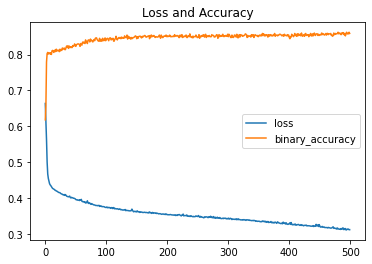

In [59]:

# Je trace la perte et la précision 

pd.DataFrame(history.history).plot(title="Loss and Accuracy")

In [60]:
'''

    Enregistrement du modele dans un fichier .hdf5

'''

model.save('model1.hdf5')


# Prédiction et résultats

In [64]:
'''

    création d'un dataframe et fichier .csv

'''

prediction = model.predict(vectorisation_test)
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = prediction
submission.loc[submission['Survived']>=0.5, 'Survived'] = 1
submission.loc[submission['Survived']<0.5, 'Survived'] = 0
submission.Survived = submission.Survived.astype(int)
submission.to_csv('gender_submission4.csv',index=False)


In [72]:
'''

    création d'un dataframe et fichier .csv

'''

submit = pd.DataFrame({"PassengerId":test.PassengerId, 'Survived':predict})
submit.to_csv("final_submission.csv",index = False)


In [75]:
'''

    prédictions

'''

predict = model.predict(vectorisation_test)
predict = (predict > 0.5).astype(int).ravel()
print(predict)



[0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [76]:
'''

    performances

'''
from sklearn import metrics

Y_pred_rand = (model.predict(vectorisation_X) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(vectorisation_y, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(vectorisation_y, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(vectorisation_y, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(vectorisation_y, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(vectorisation_y, Y_pred_rand)*100,2))


Precision :  89.49
Accuracy :  86.08
Recall :  72.22
F1 score :  79.94
AUC :  83.47



- 520 + 247 = 767 prédictions exactes.
- 95 + 29 = 124 fausses prédictions.

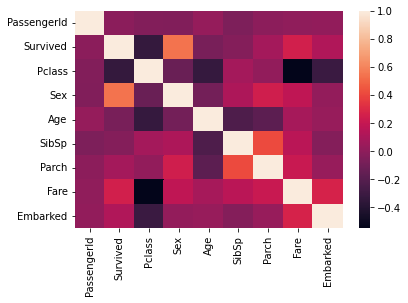

In [39]:
'''

    carte thermique de correlation

'''

corr_train = train.corr()
sns.heatmap(corr_train)
plt.show()


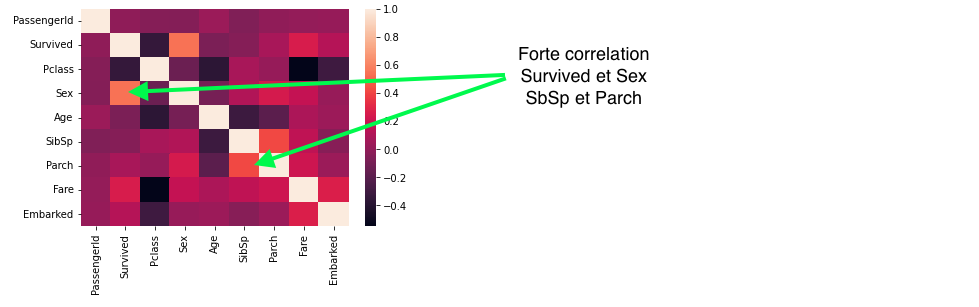